# Classification clientèle

En qualité de représentant pour un centre commercial de supermarché et grâce aux cartes de membre, vous disposez de données de base sur vos clients telles que l’ID client, l’âge, le sexe, le revenu annuel et le score de dépenses. Le score de dépense est quelque chose que vous attribuez au client en fonction de vos paramètres définis tels que le comportement du client et les données d’achat.

Notre mission sera de déterminer si, à travers la base de données obtenue, nous avons la possibilité de segmenter notre clientèle et d'en retirer un ou plusieurs groupes de clients.

# Sommaire


## I. Importation des données
#### A. Importation des bibliothèques
#### B. Importation du fichier

## II. Exploration du fichier
#### A. Analyse des variables
#### B. Analyse statistiques des données

## III. Modélisation
#### A. KMeans
#### B. DBSCAN
#### C. ACP du KMeans
#### D. Optimisation

## IV. Conclusion

# 

## I. Importation des données

#### A. Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Divers
import warnings
warnings.filterwarnings('ignore')


# Encodage et standardisation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Importation pour l'ACP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# Pour la classification KMeans
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes


# Nous allons déterminer le epsilon optimal
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


# Optimisation du modèle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [2]:
# Définition titre graphique

title = {"family": "arial",
              "color":  "black",
              "weight": "bold",
              "size": 18}

#### B. Importation du fichier

In [3]:
data = pd.read_csv('Mall_Customers.csv')

# 

## II. Exploration du fichier

#### A. Analyse des variables

In [4]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Notre fichier comporte 5 colonnes qui précisent l'âge, le sexe, le revenu annuel et un score de dépenses.

Nous allons analyser les différentes colonnes.

Female    112
Male       88
Name: Genre, dtype: int64


Text(0.5, 1.0, 'Représentation du sexe des clients')

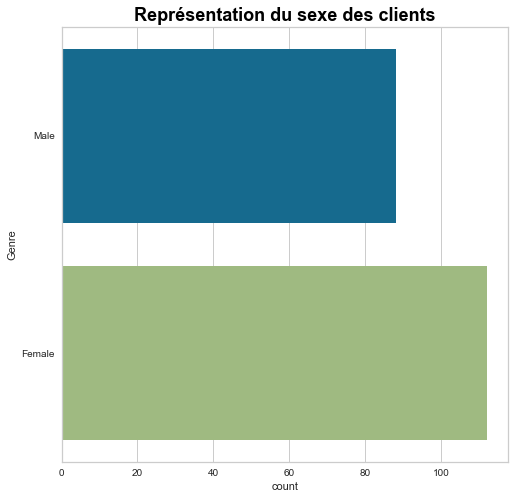

In [6]:
# Analyse sexe

print(data['Genre'].value_counts())

plt.figure(figsize = (8,8))
sns.countplot(y = data['Genre'], data = data)
plt.title('Représentation du sexe des clients',
         fontdict = title)

Sur notre base de données de 200 clients, nous constatons que nous avons plus de femmes que d'hommes.

51


Text(0.5, 1.0, 'Représentation du sexe des clients')

<Figure size 576x576 with 0 Axes>

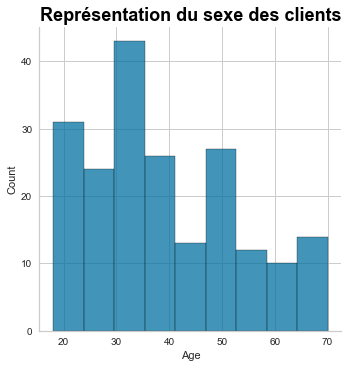

In [7]:
# Analyse Age

print(data['Age'].nunique())

plt.figure(figsize = (8,8))
sns.displot(x = data['Age'], data = data)
plt.title('Représentation du sexe des clients',
         fontdict = title)

Text(0.5, 1.0, "Représentation de l'âge des clients en fonction de leur sexe")

<Figure size 576x576 with 0 Axes>

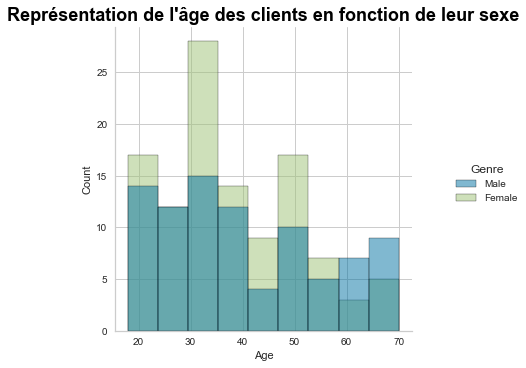

In [8]:
# Représentation de l'âge des clients en fonction du sexe

plt.figure(figsize = (8,8))
sns.displot(x = data['Age'], data = data, hue = data['Genre'])
plt.title("Représentation de l'âge des clients en fonction de leur sexe",
         fontdict = title)

Nous constatons qu'une grande majorité des clients de la société ont moins de 40 ans. Les femmes sont plus jeunes que les hommes dans la base de données.

In [9]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Text(0.5, 1.0, 'Représentation du revenu des clients')

<Figure size 576x576 with 0 Axes>

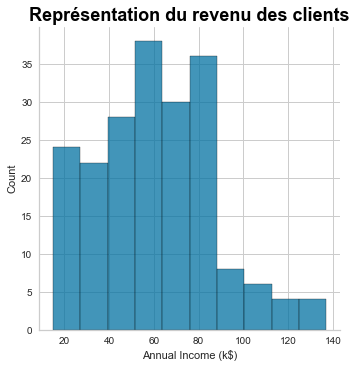

In [10]:
# Analyse 'Annual Income (k$)'

data['Annual Income (k$)'].nunique()

# Représentation de l'âge des clients en fonction du sexe

plt.figure(figsize = (8,8))
sns.displot(x = data['Annual Income (k$)'], data = data)
plt.title('Représentation du revenu des clients',
         fontdict = title)

Nous pouvons constater que les revenus des clients oscillent entre 15 et environ 140000$ par an. Une grande majorité des revenus semblent être entre 50 et 90000$ par an.

Nous allons, à présent, analyser les revenus en fonction de l'âge et du sexe.

Text(0.5, 1.0, 'Représentation du revenu des clients en fonction de leur sexe')

<Figure size 576x576 with 0 Axes>

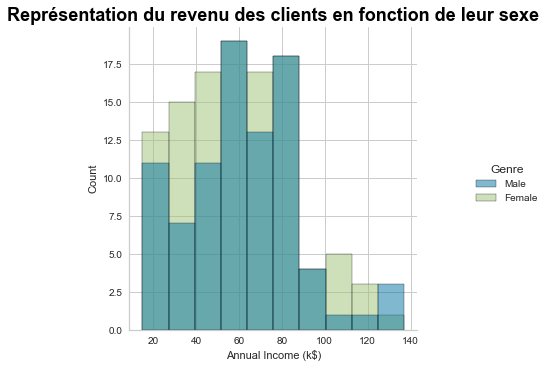

In [11]:
plt.figure(figsize = (8,8))
sns.displot(x = data['Annual Income (k$)'], data = data, hue = data['Genre'])
plt.title("Représentation du revenu des clients en fonction de leur sexe",
         fontdict = title)

Sur notre analyse, il semble que les revenus les plus élevés sont plus fréquents pour les hommes que pour les femmes.

In [12]:
# 'Spending Score (1-100)'

data['Spending Score (1-100)'].nunique()

84

Text(0.5, 1.0, 'Analyse du score de dépenses des clients')

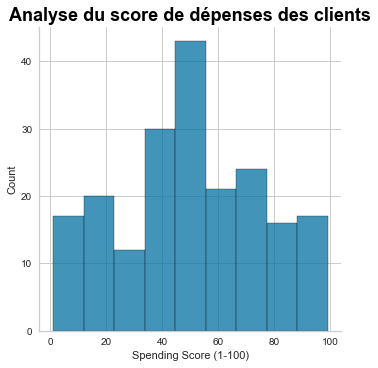

In [13]:
sns.displot(x = data['Spending Score (1-100)'], data = data)
plt.title('Analyse du score de dépenses des clients',
         fontdict = title)

Text(0.5, 1.0, 'Analyse du score de dépenses des clients en fonction de leur sexe')

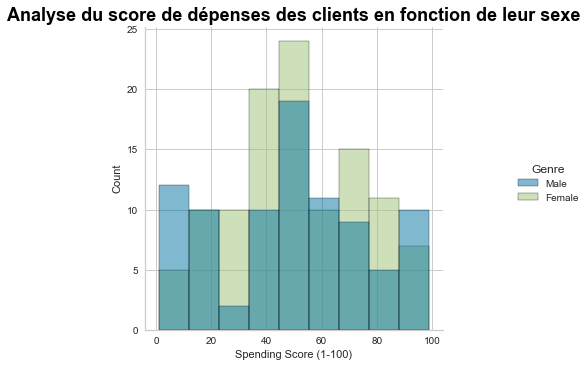

In [14]:
sns.displot(x = data['Spending Score (1-100)'], data = data, hue = data['Genre'])
plt.title('Analyse du score de dépenses des clients en fonction de leur sexe',
         fontdict = title)

Nous pouvons analyser une répartition uniforme du score des dépenses. Le genre des clients apportent peu d'informations sur la répartition du score des dépenses.

#### B. Analyse statistiques des données

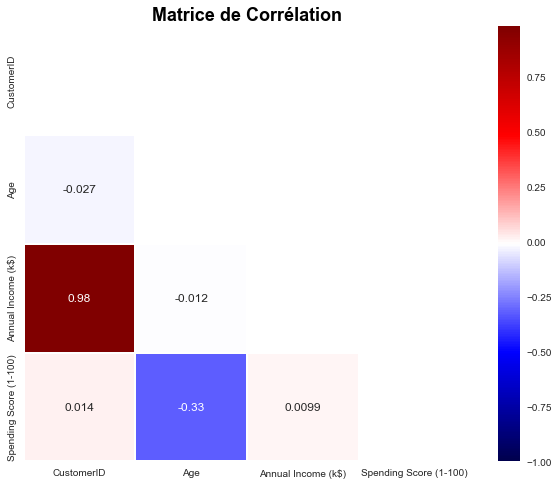

In [15]:
# Analyse corrélation de nos variables

correlation = data.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

plt.figure (figsize = (10,8))
ax = sns.heatmap(correlation, mask=mask, vmin=-1, cmap='seismic', linewidth = 0.2, annot = True)
plt.title('Matrice de Corrélation', fontdict=title)
plt.show()

In [16]:
# Analyse statistique des variables après filtre des données

data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## III. Modélisation

Nous sommes dans le cadre d'un apprentissage non supervisé. Nous allons donc procéder à une modélisation de nos données à travers une segmentation de notre clientèle.

Pour cela, nous allons tester deux modèles :
- KMeans,
- DBSCAN.

In [17]:
data1 = data[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]


label_encoder = preprocessing.LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

data1['Genre'] = label_encoder.fit_transform(data1['Genre'])

data.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81


In [18]:
data_acp = data[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

In [19]:
# Standardisation des données

scaler = StandardScaler()

data = scaler.fit_transform(data1)

In [20]:
# TSNE

tsne = TSNE()
T = tsne.fit_transform(data1.copy())

<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

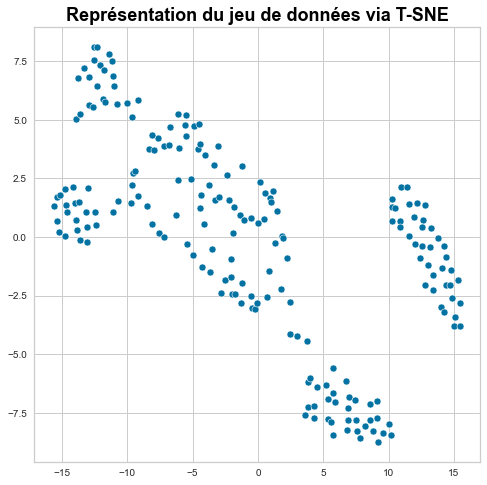

In [21]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE', fontdict = title)
sns.scatterplot(T[:,0], T[:,1])

Nous avons ici la possibilité d'analyser nos différents points à travers la méthode du TSNE.

A présent, nous allons utiliser la méthode du KMeans

#### A. KMeans

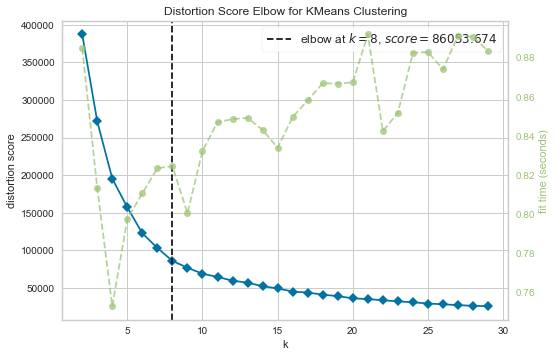

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
data_kmeans = KMeans()
# k est la plage du nombre de clusters.
visualizer = KElbowVisualizer(data_kmeans, k=(2,30), timings= True)
# Fit data
visualizer.fit(data1)    
visualizer.show()

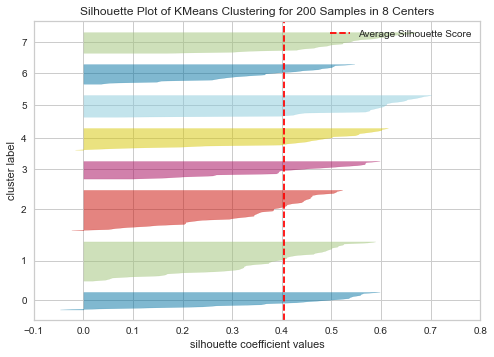

In [23]:
data_kmeans = KMeans(n_clusters=8)
visualizer = SilhouetteVisualizer(data_kmeans, colors='yellowbrick')
visualizer.fit(data1)
visualizer.show()
plt.show()

In [24]:
inertia = {}
dict_kmeans1 = {}

nb_boucles=2
max_clusters = 15

for k in range(1,nb_boucles+1):
    print('Boucle ',k)
    for i in range(1,max_clusters+1):
        kmeans = KMeans(n_clusters=i).fit(data1)
        inertia[(k,i)] = kmeans.inertia_
        dict_kmeans1[k,i] = kmeans

Boucle  1
Boucle  2


<AxesSubplot:title={'center':'Représentation T-SNE de la séparation du jeu de données via KMeans (10 clusters)'}>

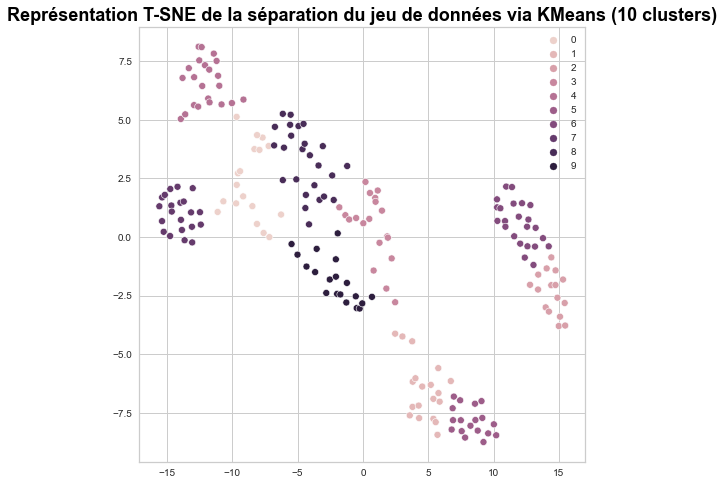

In [25]:
plt.figure(figsize=(8,8))
plt.title('Représentation T-SNE de la séparation du jeu de données via KMeans (10 clusters)',
         fontdict = title)
sns.scatterplot(T[:,0], 
                T[:,1],
               hue=dict_kmeans1[(1,10)].labels_,
                legend='full')

In [26]:
clusters = data_kmeans.labels_

label_centroide = data_kmeans.labels_
data1['label_centroide'] = label_centroide

#### B. DBSCAN

In [27]:
# Nous allons déterminer le epsilon optimal

sns.set()

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

Text(0.5, 1.0, 'Représentation de epsilon')

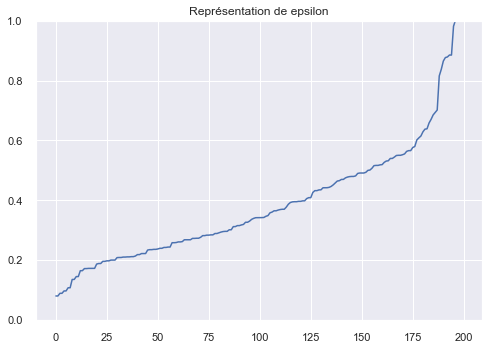

In [28]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim(0,1)
plt.title('Représentation de epsilon')

Notre epsilon optimal semble être 0.6, nous allons utiliser ce dernier afin d'obtenir la meilleure distance pour nos clusters avec cet algorithme.

In [29]:
dbs = DBSCAN(eps = 0.6).fit(data)
labels = dbs.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 10
Estimated number of noise points: 97


<AxesSubplot:title={'center':'Représentation de la séparation des données du DBSCAN via T-SNE'}>

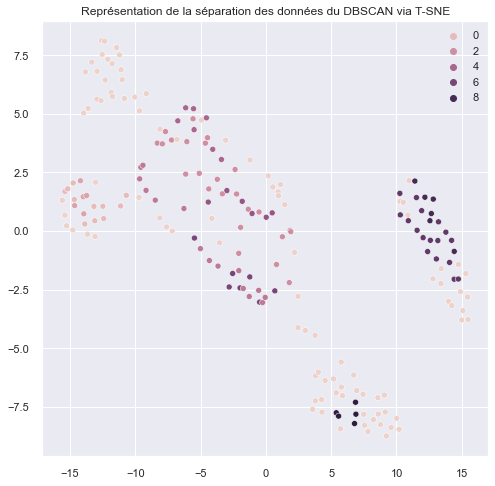

In [30]:
plt.figure(figsize=(8,8))
plt.title('Représentation de la séparation des données du DBSCAN via T-SNE')
sns.scatterplot(T[:,0], T[:,1], dbs.labels_)

#### Sélection du meilleur modèle

Nos deux modèles indiquent une présence de 10 clusters mais il semble que le KMeans présente une meilleure segmentation de nos données.
Nous allons prendre la décision de conserver ce modèle et de l'améliorer à travers une optimisation.

Avant cela, nous allons regarder la segmentation de nos données à travers une ACP.

#### C. ACP du KMeans

In [31]:
scaler = StandardScaler()

X = data_acp[['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']]

X_scaled = scaler.fit_transform(X)

pca = PCA(X)

In [32]:
# On démarre par la création de notre variable names et features

names = data_acp.index
features = data_acp.columns

In [33]:
# Vérification de nos données
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4
mean,-0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0


In [34]:
# Création nombre de composants (choix aléatoire)

n_components = 4

# On lance notre ACP

pca = PCA(n_components=n_components)

# On l'entraîne sur nos données
df_pca = pca.fit_transform(X_scaled)

df_pca.shape

(200, 4)

In [35]:
# Création de nos données dans un Dataframe
data_pca = pd.DataFrame(X, columns=['CP_1', 'CP_2', 'CP_3', 'CP_4'])

In [36]:
# Utilisation de la variance captée
pca.explained_variance_ratio_

# On enregistre cette donnée dans une variable
varcum = (pca.explained_variance_ratio_*100).round(2)
pca_variance = pca_variance = pca.explained_variance_ratio_

# Somme cumulée
somcum = varcum.cumsum().round()


print('La variable cumulée est de :',varcum)
print('La somme cumulée est de :',somcum)

La variable cumulée est de : [39.7  26.95 19.45 13.46]
La somme cumulée est de : [ 40.  67.  86. 100.]


In [37]:
# Création de nos données dans un Dataframe
data_pc = pd.DataFrame(df_pca, columns=['CP_1', 'CP_2', 'CP_3', 'CP_4'])
data_graph = data_pc.join(X, how = 'left')

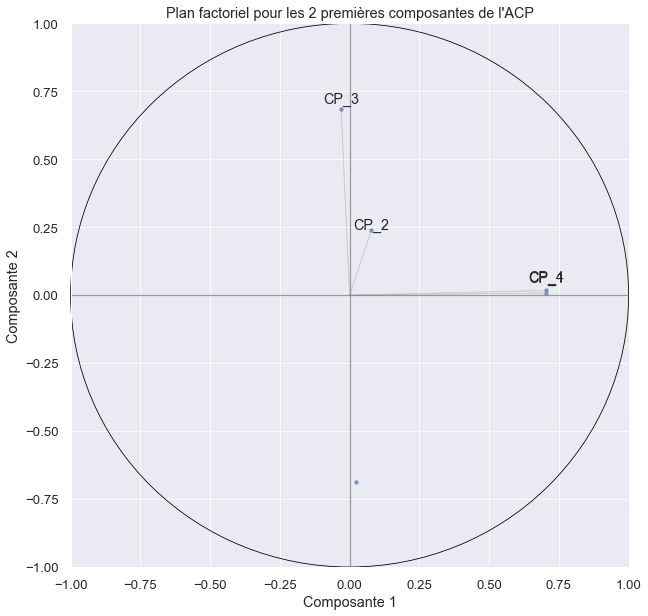

In [38]:
data_pca = data_pca.select_dtypes(['float64','int32'])
colonnes_pca = data_pca.columns


from matplotlib.patches import Circle

sns.set_context("paper", font_scale=1.5) 
plt.figure(figsize=(10,10))
plt.title("Plan factoriel pour les 2 premières composantes de l'ACP")
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
ax = plt.gca()
ax.add_patch(Circle([0,0], radius=1, color='black', fill=False, linestyle='-', clip_on=False))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
x_pca = pca.components_[0,:]
y_pca = pca.components_[1,:]

sns.scatterplot(x = x_pca,
                y = y_pca,
               alpha = 0.7)
plt.plot([-1,1],[0,0], color='grey', alpha=0.8)
plt.plot([0,0],[-1,1], color='grey', alpha=0.8)

i = 0
for x,y,colonne in zip(x_pca,y_pca, colonnes_pca):

    plt.annotate(colonne, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(0,5+np.random.randint(-10,10)),
                 ha='center') 
    ax.arrow(0, 0, x, y, head_width=0, head_length=0, fc='grey', ec='grey',alpha=0.2)


sns.set_context("paper", font_scale=1) 

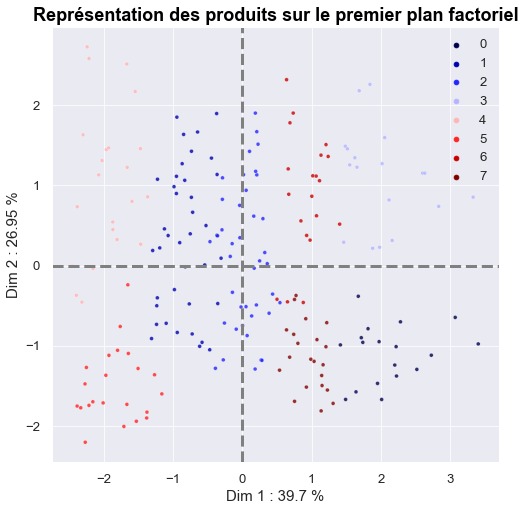

In [39]:
# visualisation des observations sur l'axe principal de l'ACP, avec couleurs selon les scores
fig = plt.figure(figsize=(8,8))
sns.set_context("paper", font_scale=1.5)

g= sns.scatterplot(data=data_pc, x='CP_1', y='CP_2', hue= clusters, alpha=0.8,
                  s=15, legend='full',
                  palette = 'seismic')

plt.title("Représentation des produits sur le premier plan factoriel", fontdict = title)
g.set_xlabel("Dim 1 : " + str(round(pca_variance[0]*100,2)) + " %", fontsize=15)
g.set_ylabel("Dim 2 : " + str(round(pca_variance[1]*100,2)) + " %", fontsize=15)

plt.axvline(color='gray', linestyle='--', linewidth=3)
plt.axhline(color='gray', linestyle='--', linewidth=3)

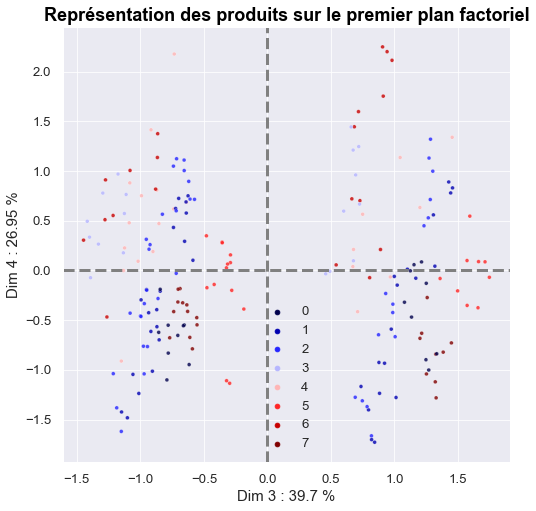

In [40]:
# visualisation des observations sur l'axe principal de l'ACP, avec couleurs selon les scores
fig = plt.figure(figsize=(8,8))
sns.set_context("paper", font_scale=1.5)

g= sns.scatterplot(data=data_pc, x='CP_3', y='CP_4', hue= clusters, alpha=0.8,
                  s=15, legend='full',
                  palette = 'seismic')

plt.title("Représentation des produits sur le premier plan factoriel", fontdict = title)
g.set_xlabel("Dim 3 : " + str(round(pca_variance[0]*100,2)) + " %", fontsize=15)
g.set_ylabel("Dim 4 : " + str(round(pca_variance[1]*100,2)) + " %", fontsize=15)

plt.axvline(color='gray', linestyle='--', linewidth=3)
plt.axhline(color='gray', linestyle='--', linewidth=3)

Nous avons ici représenté notre modélisation à travers une ACP. Nous allons maintenant procéder à une optimisation du KMeans.

#### D. Optimisation

In [41]:
%%time

grid_param = {'max_iter': [50, 100, 150, 200 ,250, 300],
             'init': ['k-means++', 'random'],
             'algorithm': ['lloyd', 'elkan', 'auto', 'full']}
              
grid_search = GridSearchCV(KMeans(), grid_param, cv = 5)

Wall time: 0 ns


In [42]:
%%time

# ici, on entraine la fonction
grid_search.fit(data1)


Wall time: 2min 47s


GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
                         'init': ['k-means++', 'random'],
                         'max_iter': [50, 100, 150, 200, 250, 300]})

In [43]:
# Connaître les meilleurs paramètres
print('Les meilleurs hyperparamètres sont : ',grid_search.best_params_)

Les meilleurs hyperparamètres sont :  {'algorithm': 'elkan', 'init': 'random', 'max_iter': 300}


Nous avons ici pu travailler les hyperparamètres du modèle KMeans afin de pouvoir obtenir le meilleur résultat pour notre segmentation des données.


## IV. Conclusion

En conclusion, nous pouvons indiquer que notre projet de segmentation concernant la base de données de cette société a fonctionné.

En effet, nous avons pu procéder à une segmentation de la clientèle et ainsi séparer ces derniers en plusieurs groupes bien distincts.
Pour cela, nous avons dabord procéder à une analyse de nos variables dans le but de connaître leur nature et les éléments présents.

Par la suite, nous avons procédé à une modélisation des données à travers deux modèles de segmentation.

Ces deux modèles ont obtenu un nombre de clusters différents. Nous avons opté pour la sélection du modèle KMeans.

Après analyse des données à travers une ACP, nous avons procédé à l'optimisation de notre modèle et ainsi obtenu les meilleurs hyperparamètres pour permettre d'améliorer notre modèle.

Enfin, nous pouvons indiquer qu'il serait intéressant d'obtenir un nombre plus importants de clients afin de déterminer si notre segmentation conserve des clusters identiques.